In [530]:
#Linear Algebra
import numpy as np
#Data preprocessing
import pandas as pd
#setting display options
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
pd.set_option('max_colwidth', 300)
np.set_printoptions(linewidth =400)
#Catboost Classifier Algorithm
#from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import classification_report
#Matlab-style plotting
from matplotlib import pyplot as plt
%matplotlib inline
#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')
#Ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

In [531]:
train_data=pd.read_csv('train.csv')

In [532]:
test_data=pd.read_csv('test.csv')

In [533]:
train_data

,accident_id,year,longitude,latitude,department,accident_type,road_category,address_nbr,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country
0,x01600000001,2016.0,0.0,0.0,590,1,3.0,39.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,7.0,1.0,NaN,1.0,2.0,A
1,x01600000001,2016.0,0.0,0.0,590,1,3.0,39.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,2.0,15.0,NaN,1.0,2.0,A
2,x01600000001,2016.0,0.0,0.0,590,2,3.0,39.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,7.0,1.0,NaN,1.0,2.0,A
3,x01600000001,2016.0,0.0,0.0,590,2,3.0,39.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,2.0,15.0,NaN,1.0,2.0,A
4,x0160000000x,2016.0,0.0,0.0,590,2,3.0,39.0,1.0,NaN,6.0,0.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,1.0,NaN,16.0,3.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221213,x019984107019,2019.0,-2.983499,55.215407,98,1,3.0,7,6.0,60.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,19.0,18.0,2.0,30.0,5.0,B
2221214,x019984107x19,2019.0,-3.274645,54.991685,98,1,4.0,723,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,B
2221215,x019984107x19,2019.0,-3.274645,54.991685,98,1,4.0,723,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,B
2221216,x019984107419,2019.0,-2.997491,55.148292,98,1,6.0,0,6.0,30.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,9.0,7.0,2.0,29.0,6.0,B


In [534]:
test_data

,trustii_id,accident_id,year,longitude,latitude,department,road_category,address_nbr,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country
0,1019363,x0x000000001,2020.0,"2,4384100","48,7053500",91,4.0,HENRI BARBUSSE (AVENUE),2.0,50.0,3.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,7.0,15.0,1.0,7.0,3.0,A
1,1019364,x0x000000001,2020.0,"2,4384100","48,7053500",91,4.0,HENRI BARBUSSE (AVENUE),2.0,50.0,3.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,33.0,2.0,1.0,7.0,3.0,A
2,1019365,x0x000000001,2020.0,"2,4384100","48,7053500",91,4.0,HENRI BARBUSSE (AVENUE),2.0,50.0,3.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,7.0,15.0,1.0,7.0,3.0,A
3,1019366,x0x000000001,2020.0,"2,4384100","48,7053500",91,4.0,HENRI BARBUSSE (AVENUE),2.0,50.0,3.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,33.0,2.0,1.0,7.0,3.0,A
4,1019367,x0x00000000x,2020.0,"2,4100000","48,6900000",91,4.0,MOUSSEAUX(CHEMIN),2.0,50.0,9.0,-1.0,2.0,7.0,1.0,0.0,1.0,1.0,7.0,26.0,1.0,7.0,3.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410479,2631697,x0x09910x7064,2020.0,-2.92632,56.473539,99,4.0,959,6.0,30.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,8.0,12.0,B
410480,2631698,x0x09910x9573,2020.0,-4.267565,55.802353,99,6.0,0,9.0,30.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,NaN,NaN,NaN,13.0,11.0,B
410481,2631699,x0x0991030x97,2020.0,-2.271903,57.186317,99,4.0,979,6.0,60.0,8.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,15.0,4.0,B
410482,2631700,x0x0991030900,2020.0,-3.968753,55.95094,99,6.0,0,6.0,30.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,15.0,12.0,B


In [535]:
train_data.columns

Index(['accident_id', 'year', 'longitude', 'latitude', 'department',
       'accident_type', 'road_category', 'address_nbr', 'traffic_type',
       'speed_limitation', 'intersection', 'pedestrian_localisation',
       'light_condition', 'weather_conditions', 'road_condition',
       'obstacle_hit_type', 'person_type', 'person_sex', 'vehicule_type',
       'principal_maneuver_before_accident', 'vehicule_motor_type', 'day',
       'month', 'country'],
      dtype='object')

In [536]:
train_data.isnull().sum()

accident_id                                0
year                                       0
longitude                             100464
latitude                              100464
department                                 0
accident_type                              0
road_category                              0
address_nbr                           164439
traffic_type                            3748
speed_limitation                      765961
intersection                               0
pedestrian_localisation               114209
light_condition                            0
weather_conditions                        55
road_condition                          4586
obstacle_hit_type                        630
person_type                           117964
person_sex                            117964
vehicule_type                          49773
principal_maneuver_before_accident     50122
vehicule_motor_type                   815648
day                                        0
month     

In [537]:
train_data.corr()['accident_type'].sort_values(ascending=False)

accident_type                         1.000000
person_type                           0.068525
obstacle_hit_type                     0.064284
speed_limitation                      0.061980
traffic_type                          0.031141
light_condition                       0.029517
pedestrian_localisation               0.020907
vehicule_type                         0.013822
day                                   0.003931
road_condition                        0.003801
month                                -0.000994
weather_conditions                   -0.001433
road_category                        -0.001906
principal_maneuver_before_accident   -0.003332
year                                 -0.003767
vehicule_motor_type                  -0.013417
intersection                         -0.031158
person_sex                           -0.051278
Name: accident_type, dtype: float64

In [538]:
train_data.corr()['accident_type'].sort_values(ascending=True)

person_sex                           -0.051278
intersection                         -0.031158
vehicule_motor_type                  -0.013417
year                                 -0.003767
principal_maneuver_before_accident   -0.003332
road_category                        -0.001906
weather_conditions                   -0.001433
month                                -0.000994
road_condition                        0.003801
day                                   0.003931
vehicule_type                         0.013822
pedestrian_localisation               0.020907
light_condition                       0.029517
traffic_type                          0.031141
speed_limitation                      0.061980
obstacle_hit_type                     0.064284
person_type                           0.068525
accident_type                         1.000000
Name: accident_type, dtype: float64

In [539]:
numeric_features = train_data.select_dtypes(include=[np.number])
numeric_features.dtypes

year                                  float64
accident_type                           int64
road_category                         float64
traffic_type                          float64
speed_limitation                      float64
intersection                          float64
pedestrian_localisation               float64
light_condition                       float64
weather_conditions                    float64
road_condition                        float64
obstacle_hit_type                     float64
person_type                           float64
person_sex                            float64
vehicule_type                         float64
principal_maneuver_before_accident    float64
vehicule_motor_type                   float64
day                                   float64
month                                 float64
dtype: object

In [540]:
numeric_features

,year,accident_type,road_category,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month
0,2016.0,1,3.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,7.0,1.0,NaN,1.0,2.0
1,2016.0,1,3.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,2.0,15.0,NaN,1.0,2.0
2,2016.0,2,3.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,7.0,1.0,NaN,1.0,2.0
3,2016.0,2,3.0,2.0,NaN,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,2.0,15.0,NaN,1.0,2.0
4,2016.0,2,3.0,1.0,NaN,6.0,0.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,1.0,NaN,16.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221213,2019.0,1,3.0,6.0,60.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,19.0,18.0,2.0,30.0,5.0
2221214,2019.0,1,4.0,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0
2221215,2019.0,1,4.0,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0
2221216,2019.0,1,6.0,6.0,30.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,9.0,7.0,2.0,29.0,6.0


In [541]:
numeric_features = train_data.select_dtypes(exclude=[np.number])
numeric_features.dtypes

accident_id    object
longitude      object
latitude       object
department     object
address_nbr    object
country        object
dtype: object

In [542]:
numeric_features

,accident_id,longitude,latitude,department,address_nbr,country
0,x01600000001,0.0,0.0,590,39.0,A
1,x01600000001,0.0,0.0,590,39.0,A
2,x01600000001,0.0,0.0,590,39.0,A
3,x01600000001,0.0,0.0,590,39.0,A
4,x0160000000x,0.0,0.0,590,39.0,A
...,...,...,...,...,...,...
2221213,x019984107019,-2.983499,55.215407,98,7,B
2221214,x019984107x19,-3.274645,54.991685,98,723,B
2221215,x019984107x19,-3.274645,54.991685,98,723,B
2221216,x019984107419,-2.997491,55.148292,98,0,B


In [543]:
encoding_country = {"country": {"A": 0, "B": 1}}
train_data.replace(encoding_country, inplace=True)
test_data.replace(encoding_country, inplace=True)

In [544]:
train_data['country']

0          0
1          0
2          0
3          0
4          0
          ..
2221213    1
2221214    1
2221215    1
2221216    1
2221217    1
Name: country, Length: 2221218, dtype: int64

In [545]:
len(numeric_features['accident_id'].unique())

743528

In [546]:
train=train_data.drop(columns=['accident_id'],axis=1)
test=test_data.drop(columns=['accident_id'],axis=1)

In [547]:
numeric_features

,accident_id,longitude,latitude,department,address_nbr,country
0,x01600000001,0.0,0.0,590,39.0,A
1,x01600000001,0.0,0.0,590,39.0,A
2,x01600000001,0.0,0.0,590,39.0,A
3,x01600000001,0.0,0.0,590,39.0,A
4,x0160000000x,0.0,0.0,590,39.0,A
...,...,...,...,...,...,...
2221213,x019984107019,-2.983499,55.215407,98,7,B
2221214,x019984107x19,-3.274645,54.991685,98,723,B
2221215,x019984107x19,-3.274645,54.991685,98,723,B
2221216,x019984107419,-2.997491,55.148292,98,0,B


In [548]:
test.dtypes

trustii_id                              int64
year                                  float64
longitude                              object
latitude                               object
department                             object
road_category                         float64
address_nbr                            object
traffic_type                          float64
speed_limitation                      float64
intersection                          float64
pedestrian_localisation               float64
light_condition                       float64
weather_conditions                    float64
road_condition                        float64
obstacle_hit_type                     float64
person_type                           float64
person_sex                            float64
vehicule_type                         float64
principal_maneuver_before_accident    float64
vehicule_motor_type                   float64
day                                   float64
month                             

In [549]:
train.dtypes

year                                  float64
longitude                              object
latitude                               object
department                             object
accident_type                           int64
road_category                         float64
address_nbr                            object
traffic_type                          float64
speed_limitation                      float64
intersection                          float64
pedestrian_localisation               float64
light_condition                       float64
weather_conditions                    float64
road_condition                        float64
obstacle_hit_type                     float64
person_type                           float64
person_sex                            float64
vehicule_type                         float64
principal_maneuver_before_accident    float64
vehicule_motor_type                   float64
day                                   float64
month                             

In [550]:
""""train['person_sex']=train['person_sex'].fillna(-1)
test['person_sex']=test['person_sex'].fillna(-1)

train['person_type']=train['person_type'].fillna(4)
test['person_type']=test['person_type'].fillna(4)

train['traffic_type']=train['traffic_type'].fillna(-1)
test['traffic_type']=test['traffic_type'].fillna(-1)

train['speed_limitation']=train['speed_limitation'].fillna(-1)
test['speed_limitation']=test['speed_limitation'].fillna(-1)

train['pedestrian_localisation']=train['pedestrian_localisation'].fillna(-1)
test['pedestrian_localisation']=test['pedestrian_localisation'].fillna(-1)

train['weather_conditions']=train['weather_conditions'].fillna(-1)
test['weather_conditions']=test['weather_conditions'].fillna(-1)

train['road_condition']=train['road_condition'].fillna(9)
test['road_condition']=test['road_condition'].fillna(9)

train['principal_maneuver_before_accident']=train['principal_maneuver_before_accident'].fillna(-1)
test['principal_maneuver_before_accident']=test['principal_maneuver_before_accident'].fillna(-1)

train['vehicule_motor_type']=train['vehicule_motor_type'].fillna(-1)
test['vehicule_motor_type']=test['vehicule_motor_type'].fillna(-1)

train['vehicule_type']=train['vehicule_type'].fillna(0)
test['vehicule_type']=test['vehicule_type'].fillna(0)

train['obstacle_hit_type']=train['obstacle_hit_type'].fillna(-1)
test['obstacle_hit_type']=test['obstacle_hit_type'].fillna(-1)"""

'"train[\'person_sex\']=train[\'person_sex\'].fillna(-1)\ntest[\'person_sex\']=test[\'person_sex\'].fillna(-1)\n\ntrain[\'person_type\']=train[\'person_type\'].fillna(4)\ntest[\'person_type\']=test[\'person_type\'].fillna(4)\n\ntrain[\'traffic_type\']=train[\'traffic_type\'].fillna(-1)\ntest[\'traffic_type\']=test[\'traffic_type\'].fillna(-1)\n\ntrain[\'speed_limitation\']=train[\'speed_limitation\'].fillna(-1)\ntest[\'speed_limitation\']=test[\'speed_limitation\'].fillna(-1)\n\ntrain[\'pedestrian_localisation\']=train[\'pedestrian_localisation\'].fillna(-1)\ntest[\'pedestrian_localisation\']=test[\'pedestrian_localisation\'].fillna(-1)\n\ntrain[\'weather_conditions\']=train[\'weather_conditions\'].fillna(-1)\ntest[\'weather_conditions\']=test[\'weather_conditions\'].fillna(-1)\n\ntrain[\'road_condition\']=train[\'road_condition\'].fillna(9)\ntest[\'road_condition\']=test[\'road_condition\'].fillna(9)\n\ntrain[\'principal_maneuver_before_accident\']=train[\'principal_maneuver_before_ac

In [551]:
train=train.replace(',','.',regex=True)
test=test.replace(',','.',regex=True)

In [552]:
#train=train.drop(columns=['vehicule_motor_type'],axis=1)
#test=test.drop(columns=['vehicule_motor_type'],axis=1)

In [553]:
train[['latitude','longitude']]=train[['latitude','longitude']].astype('float')

In [554]:
test[['latitude','longitude']]=test[['latitude','longitude']].astype('float')

In [555]:
#train[['latitude','longitude']]=train[['latitude','longitude']].fillna(0)
#test[['latitude','longitude']]=test[['latitude','longitude']].fillna(0)

In [556]:
def preprocess_data(_test):
    test = _test.copy()


    # for longitude & latitude

    ll = test[test.longitude.isnull()].department.unique()
    n_lon = []
    n_lat = []
    for i in range(len(ll)):
        n_lon.append(test[test.department == ll[i]].longitude.mean())
        n_lat.append(test[test.department == ll[i]].latitude.mean())

    # fill na
    for i in range(len(ll)):
        index = test[(test.latitude.isnull()) & (test.department == ll[i])].index
        test.loc[index, 'latitude'] = n_lat[i]
        test.loc[index, 'longitude'] = n_lon[i]

    test['traffic_type']= test['traffic_type'].fillna(test['traffic_type'].median())
    test['weather_conditions']= test['weather_conditions'].fillna(test['weather_conditions'].median())
    test['road_condition']= test['road_condition'].fillna(test['road_condition'].median())
    test['obstacle_hit_type']= test['obstacle_hit_type'].fillna(test['obstacle_hit_type'].median())
    test['person_type']= test['person_type'].fillna(test['person_type'].median())
    test['person_sex']= test['person_sex'].fillna(test['person_sex'].median())
    test['principal_maneuver_before_accident']= test['principal_maneuver_before_accident'].fillna(test['principal_maneuver_before_accident'].median())
    test['pedestrian_localisation']= test['pedestrian_localisation'].fillna(test['pedestrian_localisation'].median())
    test['vehicule_type']= test['vehicule_type'].fillna(test['vehicule_type'].median())
    test['vehicule_motor_type']= test['vehicule_motor_type'].fillna(test['vehicule_motor_type'].median())
    test['speed_limitation']= test['speed_limitation'].fillna(test['speed_limitation'].median())


    return test

In [557]:
train = preprocess_data(train)

In [558]:
train.isna().sum()

year                                       0
longitude                                  0
latitude                                   0
department                                 0
accident_type                              0
road_category                              0
address_nbr                           164439
traffic_type                               0
speed_limitation                           0
intersection                               0
pedestrian_localisation                    0
light_condition                            0
weather_conditions                         0
road_condition                             0
obstacle_hit_type                          0
person_type                                0
person_sex                                 0
vehicule_type                              0
principal_maneuver_before_accident         0
vehicule_motor_type                        0
day                                        0
month                                      0
country   

In [559]:
test = preprocess_data(test)

In [560]:
test.isna().sum()

trustii_id                                0
year                                      0
longitude                                 0
latitude                                  0
department                                0
road_category                             0
address_nbr                           39379
traffic_type                              0
speed_limitation                          0
intersection                              0
pedestrian_localisation                   0
light_condition                           0
weather_conditions                        0
road_condition                            0
obstacle_hit_type                         0
person_type                               0
person_sex                                0
vehicule_type                             0
principal_maneuver_before_accident        0
vehicule_motor_type                       0
day                                       0
month                                     0
country                         

In [561]:
train['department']=train['department'].replace('2B',28)
train['department']=train['department'].replace('2A',27)
train['department']=train['department'].astype(int)

In [562]:
test['department']=test['department'].replace('2B',28)
test['department']=test['department'].replace('2A',27)
test['department']=test['department'].astype(int)

In [563]:
train=train.drop(columns=['address_nbr'],axis=1)
test=test.drop(columns=['address_nbr'],axis=1)

In [564]:
train['night'] = train['light_condition']
train.loc[train['night'] == 1,'night' ] = 0
train.loc[train['night'] == 2,'night' ] = 0
train.loc[train['night'] == 3,'night' ] = 1
train.loc[train['night'] == 4,'night' ] = 1
train.loc[train['night'] == 5,'night' ] = 1
train.loc[train['night'] == 6,'night' ] = 1
train.loc[train['night'] == 7,'night' ] = 1
train['bad_conditions'] = train['light_condition']
train['bad_conditions'] = 0
train.loc[train["light_condition"] == 3, "bad_conditions"] = 1
train.loc[train["light_condition"] == 4, "bad_conditions"] = 1
train.loc[train["light_condition"] == 6, "bad_conditions"] = 1
train.loc[train["weather_conditions"] == 3, "bad_conditions"] = 1
train.loc[train["weather_conditions"] == 4, "bad_conditions"] = 1
train.loc[train["weather_conditions"] == 5, "bad_conditions"] = 1
train.loc[train["weather_conditions"] == 6, "bad_conditions"] = 1

In [565]:
test['night'] = test['light_condition']
test.loc[train['night'] == 1,'night' ] = 0
test.loc[train['night'] == 2,'night' ] = 0
test.loc[train['night'] == 3,'night' ] = 1
test.loc[train['night'] == 4,'night' ] = 1
test.loc[train['night'] == 5,'night' ] = 1
test.loc[train['night'] == 6,'night' ] = 1
test.loc[train['night'] == 7,'night' ] = 1
test['bad_conditions'] = test['light_condition']
test['bad_conditions'] = 0
test.loc[train["light_condition"] == 3, "bad_conditions"] = 1
test.loc[train["light_condition"] == 4, "bad_conditions"] = 1
test.loc[train["light_condition"] == 6, "bad_conditions"] = 1
test.loc[train["weather_conditions"] == 3, "bad_conditions"] = 1
test.loc[train["weather_conditions"] == 4, "bad_conditions"] = 1
test.loc[train["weather_conditions"] == 5, "bad_conditions"] = 1
test.loc[train["weather_conditions"] == 6, "bad_conditions"] = 1

<AxesSubplot:>

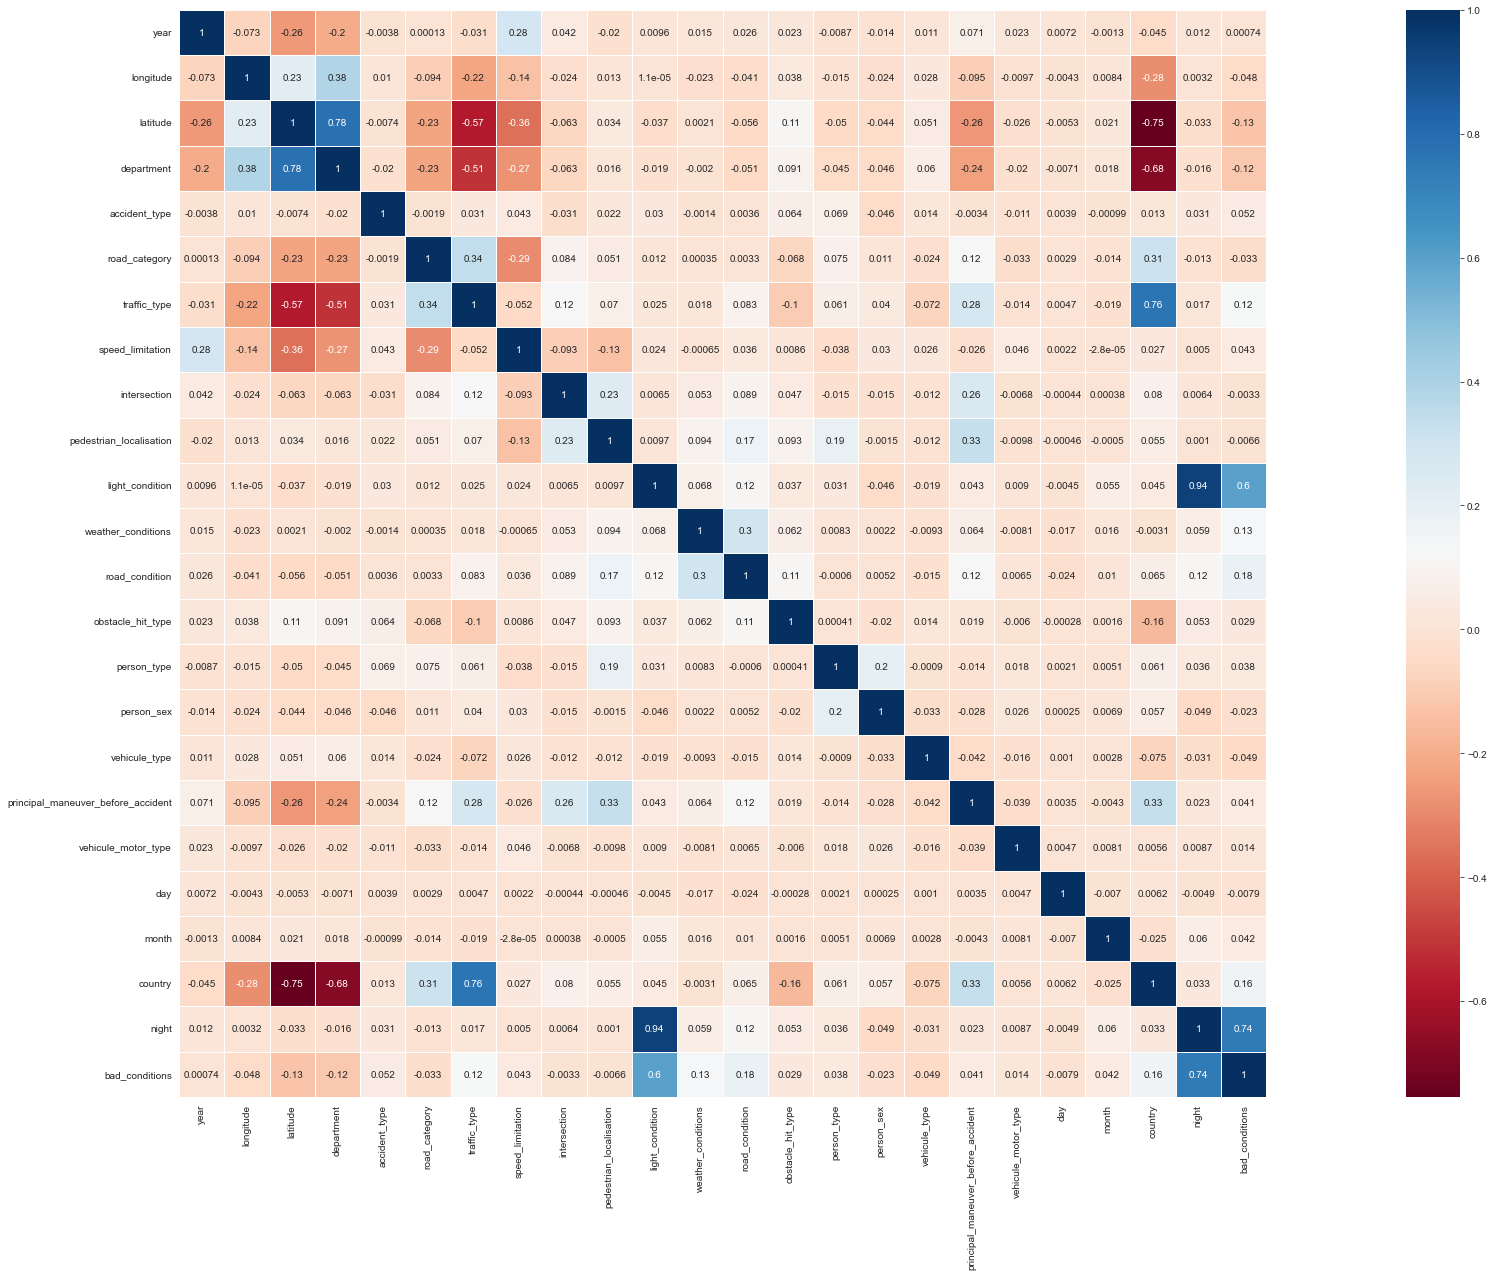

In [566]:
corrmat =train.corr()
f, ax = plt.subplots(figsize=(50,20))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

In [567]:
#traind=train.dropna()

In [568]:
encoding_at = {"accident_type": {1: 0, 2: 1}}
train.replace(encoding_at, inplace=True)

In [569]:
train[train['accident_type']==0].count()

year                                  1794053
longitude                             1794053
latitude                              1794053
department                            1794053
accident_type                         1794053
road_category                         1794053
traffic_type                          1794053
speed_limitation                      1794053
intersection                          1794053
pedestrian_localisation               1794053
light_condition                       1794053
weather_conditions                    1794053
road_condition                        1794053
obstacle_hit_type                     1794053
person_type                           1794053
person_sex                            1794053
vehicule_type                         1794053
principal_maneuver_before_accident    1794053
vehicule_motor_type                   1794053
day                                   1794053
month                                 1794053
country                           

<AxesSubplot:>

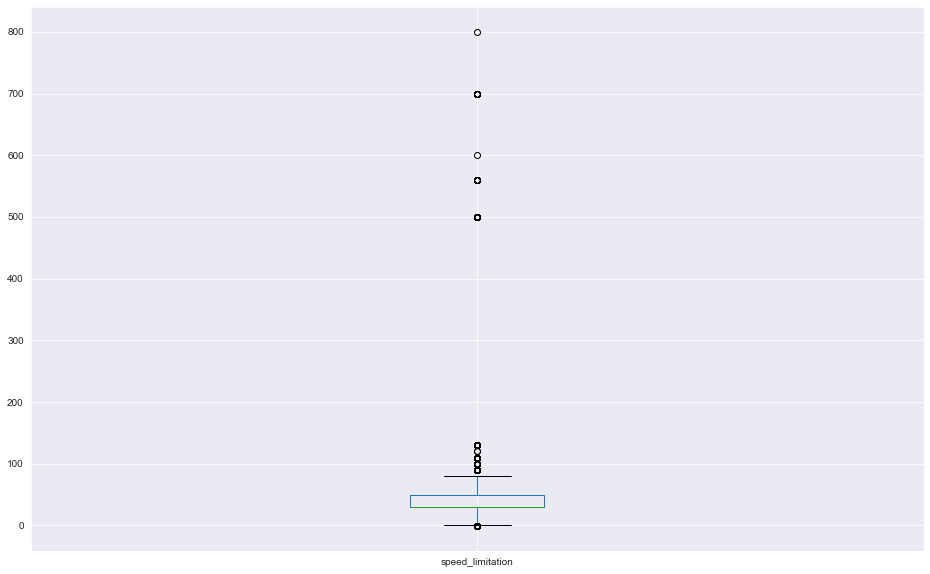

In [570]:
train.boxplot(['speed_limitation'])

<AxesSubplot:>

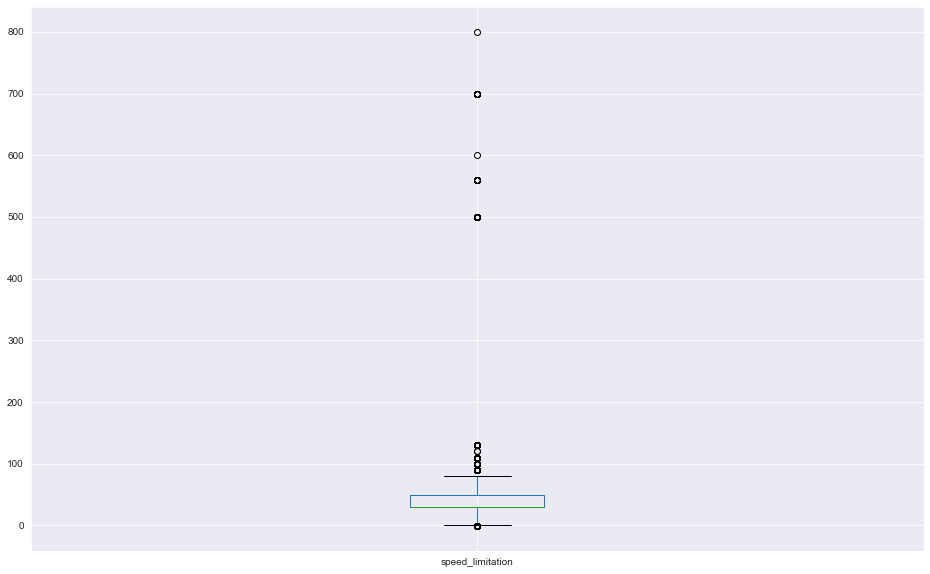

In [571]:
train.boxplot(['speed_limitation'])

In [572]:
train

,year,longitude,latitude,department,accident_type,road_category,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country,night,bad_conditions
0,2016.0,0.000000,0.000000,590,0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,7.0,1.0,1.0,1.0,2.0,0,0.0,0
1,2016.0,0.000000,0.000000,590,0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,2.0,15.0,1.0,1.0,2.0,0,0.0,0
2,2016.0,0.000000,0.000000,590,1,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,0,0.0,0
3,2016.0,0.000000,0.000000,590,1,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,2.0,15.0,1.0,1.0,2.0,0,0.0,0
4,2016.0,0.000000,0.000000,590,1,3.0,1.0,30.0,6.0,0.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,1.0,1.0,16.0,3.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221213,2019.0,-2.983499,55.215407,98,0,3.0,6.0,60.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,19.0,18.0,2.0,30.0,5.0,1,0.0,0
2221214,2019.0,-3.274645,54.991685,98,0,4.0,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,1,0.0,0
2221215,2019.0,-3.274645,54.991685,98,0,4.0,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,1,0.0,0
2221216,2019.0,-2.997491,55.148292,98,0,6.0,6.0,30.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,9.0,7.0,2.0,29.0,6.0,1,0.0,0


In [573]:
train['speed_limitation']=train.apply(lambda x :x[7]/10 if (x[7]>130 and x[21]==0) else x[7],axis=1)
train['speed_limitation']=train.apply(lambda x :x[7]/10 if (x[7]>244 and x[21]==1) else x[7],axis=1)

<AxesSubplot:>

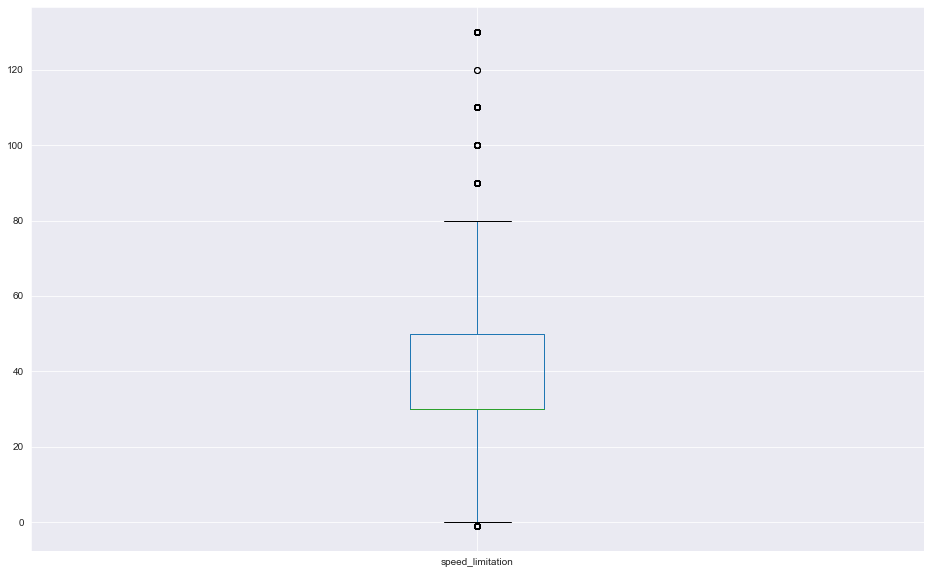

In [574]:
train.boxplot(['speed_limitation'])

<AxesSubplot:>

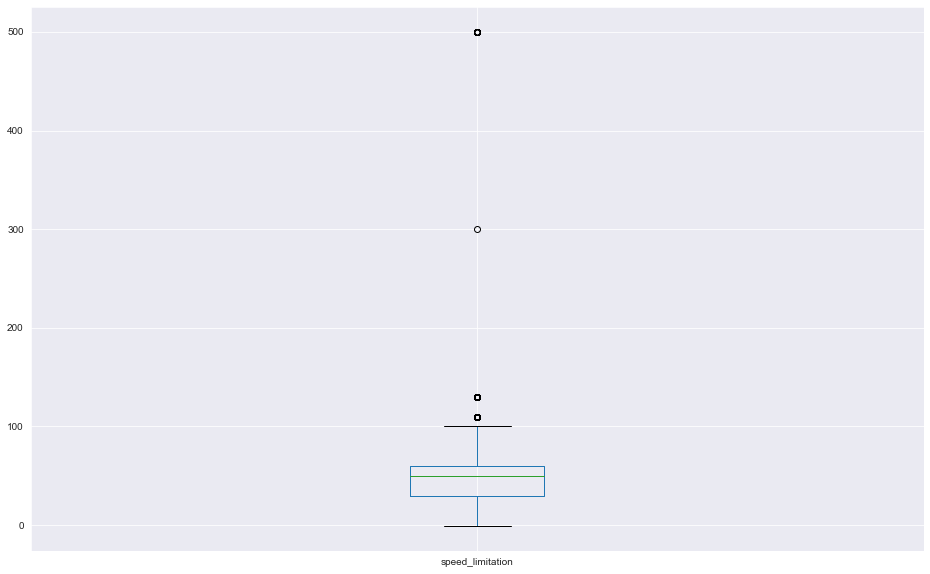

In [575]:
test.boxplot(['speed_limitation'])

In [576]:
test

,trustii_id,year,longitude,latitude,department,road_category,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country,night,bad_conditions
0,1019363,2020.0,2.438410,48.705350,91,4.0,2.0,50.0,3.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,7.0,15.0,1.0,7.0,3.0,0,1.0,0
1,1019364,2020.0,2.438410,48.705350,91,4.0,2.0,50.0,3.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,33.0,2.0,1.0,7.0,3.0,0,1.0,0
2,1019365,2020.0,2.438410,48.705350,91,4.0,2.0,50.0,3.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,7.0,15.0,1.0,7.0,3.0,0,1.0,0
3,1019366,2020.0,2.438410,48.705350,91,4.0,2.0,50.0,3.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,33.0,2.0,1.0,7.0,3.0,0,1.0,0
4,1019367,2020.0,2.410000,48.690000,91,4.0,2.0,50.0,9.0,-1.0,2.0,7.0,1.0,0.0,1.0,1.0,7.0,26.0,1.0,7.0,3.0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410479,2631697,2020.0,-2.926320,56.473539,99,4.0,6.0,30.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,10.0,1.0,8.0,12.0,1,1.0,0
410480,2631698,2020.0,-4.267565,55.802353,99,6.0,9.0,30.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,9.0,10.0,1.0,13.0,11.0,1,1.0,0
410481,2631699,2020.0,-2.271903,57.186317,99,4.0,6.0,60.0,8.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,10.0,1.0,15.0,4.0,1,1.0,0
410482,2631700,2020.0,-3.968753,55.950940,99,6.0,6.0,30.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,10.0,1.0,15.0,12.0,1,1.0,0


In [577]:
test['speed_limitation']=test.apply(lambda x :x[7]/10 if (x[7]>130 and x[21]==0) else x[7],axis=1)
test['speed_limitation']=test.apply(lambda x :x[7]/10 if (x[7]>244 and x[21]==1) else x[7],axis=1)

<AxesSubplot:>

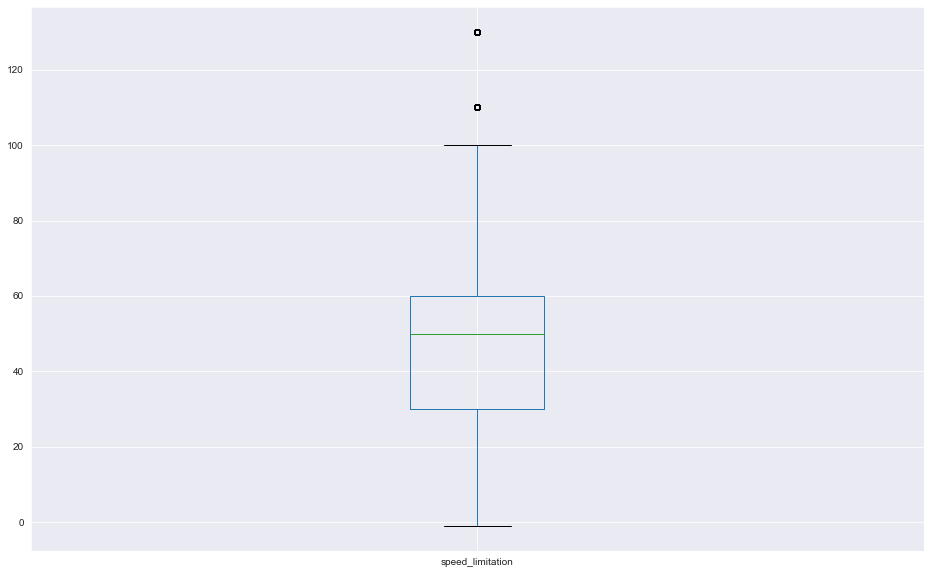

In [578]:
test.boxplot(['speed_limitation'])

In [579]:
from sklearn.cluster import KMeans

In [580]:
full_data=pd.concat([train, test], axis=0)

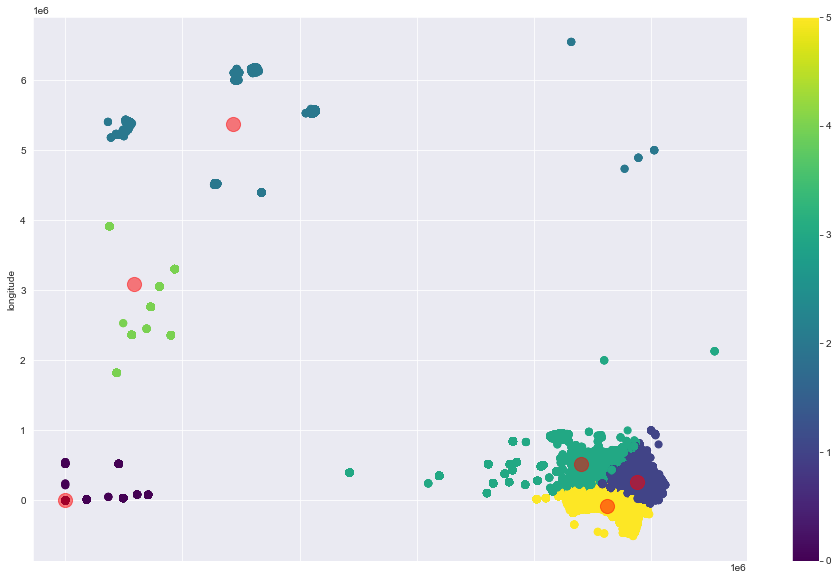

In [581]:
# Cluster Lat and Long 
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(full_data[['latitude','longitude']])
full_data['cluster_label'] = kmeans.fit_predict(full_data[['latitude','longitude']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(full_data[['latitude','longitude']])
# Full_data['cluster_label'].value_counts()
full_data.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5) 

In [582]:
train=full_data[full_data['accident_type'].notnull()]
test=full_data[full_data['trustii_id'].notnull()]

In [583]:
train=train.drop(['trustii_id'],axis=1)
test=test.drop(['accident_type'],axis=1)

In [584]:
#Manhattan distnace
def manhattan_distance(lat, lon):
    a = np.abs(lat -lon)
    return a
train['manhattan_dist'] = manhattan_distance(train['longitude'].values, train['latitude'].values,)
test['manhattan_dist'] = manhattan_distance(test['longitude'].values, test['latitude'].values,)
train.head()

,year,longitude,latitude,department,accident_type,road_category,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country,night,bad_conditions,cluster_label,manhattan_dist
0,2016.0,0.0,0.0,590,0.0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,7.0,1.0,1.0,1.0,2.0,0,0.0,0,0,0.0
1,2016.0,0.0,0.0,590,0.0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,2.0,15.0,1.0,1.0,2.0,0,0.0,0,0,0.0
2,2016.0,0.0,0.0,590,1.0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,0,0.0,0,0,0.0
3,2016.0,0.0,0.0,590,1.0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,2.0,15.0,1.0,1.0,2.0,0,0.0,0,0,0.0
4,2016.0,0.0,0.0,590,1.0,3.0,1.0,30.0,6.0,0.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,1.0,1.0,16.0,3.0,0,0.0,0,0,0.0


In [585]:
def bearing_array(lat, lng):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lat - lng)
    lat, lng = map(np.radians, (lat, lng))
    y = np.sin(lng_delta_rad) * np.cos(lat)
    x = np.cos(lat) * np.sin(lat) - np.sin(lng) * np.cos(lng) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
train['bearing'] = bearing_array(train['latitude'].values, train['longitude'].values,)
test['bearing'] = bearing_array(test['latitude'].values, test['longitude'].values,)
train.head()

,year,longitude,latitude,department,accident_type,road_category,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country,night,bad_conditions,cluster_label,manhattan_dist,bearing
0,2016.0,0.0,0.0,590,0.0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,7.0,1.0,1.0,1.0,2.0,0,0.0,0,0,0.0,0.0
1,2016.0,0.0,0.0,590,0.0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,2.0,15.0,1.0,1.0,2.0,0,0.0,0,0,0.0,0.0
2,2016.0,0.0,0.0,590,1.0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,0,0.0,0,0,0.0,0.0
3,2016.0,0.0,0.0,590,1.0,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,2.0,15.0,1.0,1.0,2.0,0,0.0,0,0,0.0,0.0
4,2016.0,0.0,0.0,590,1.0,3.0,1.0,30.0,6.0,0.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,1.0,1.0,16.0,3.0,0,0.0,0,0,0.0,0.0


<AxesSubplot:>

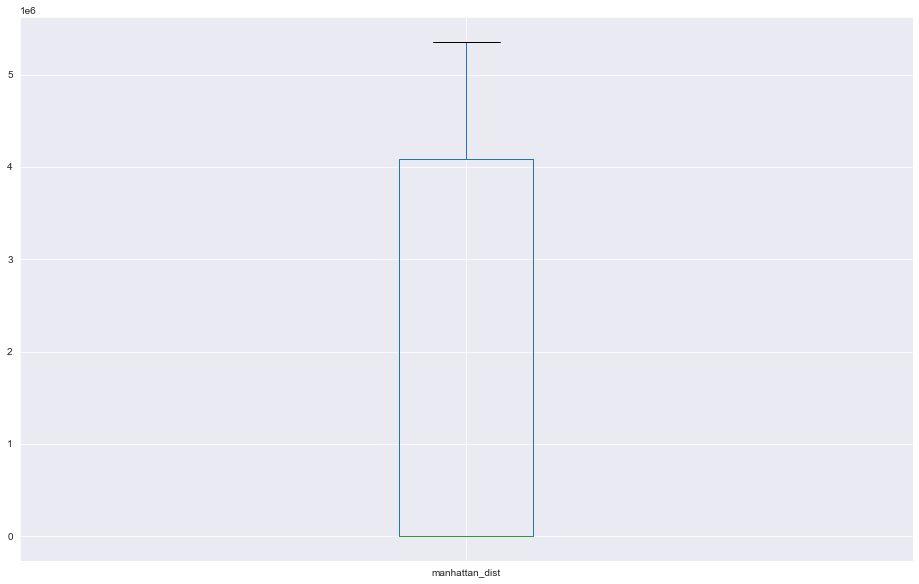

In [586]:
train.boxplot(['manhattan_dist'])

<AxesSubplot:>

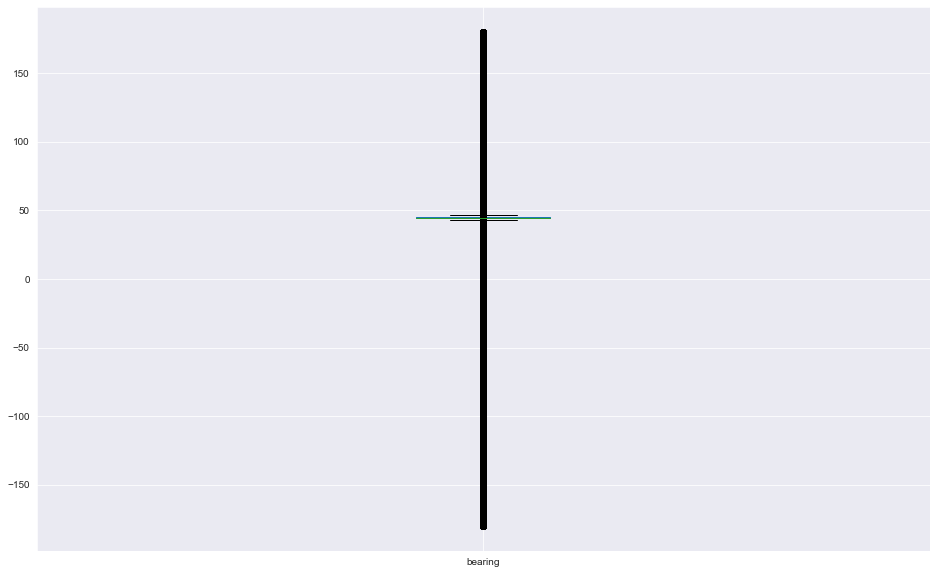

In [587]:
train.boxplot(['bearing'])

<AxesSubplot:>

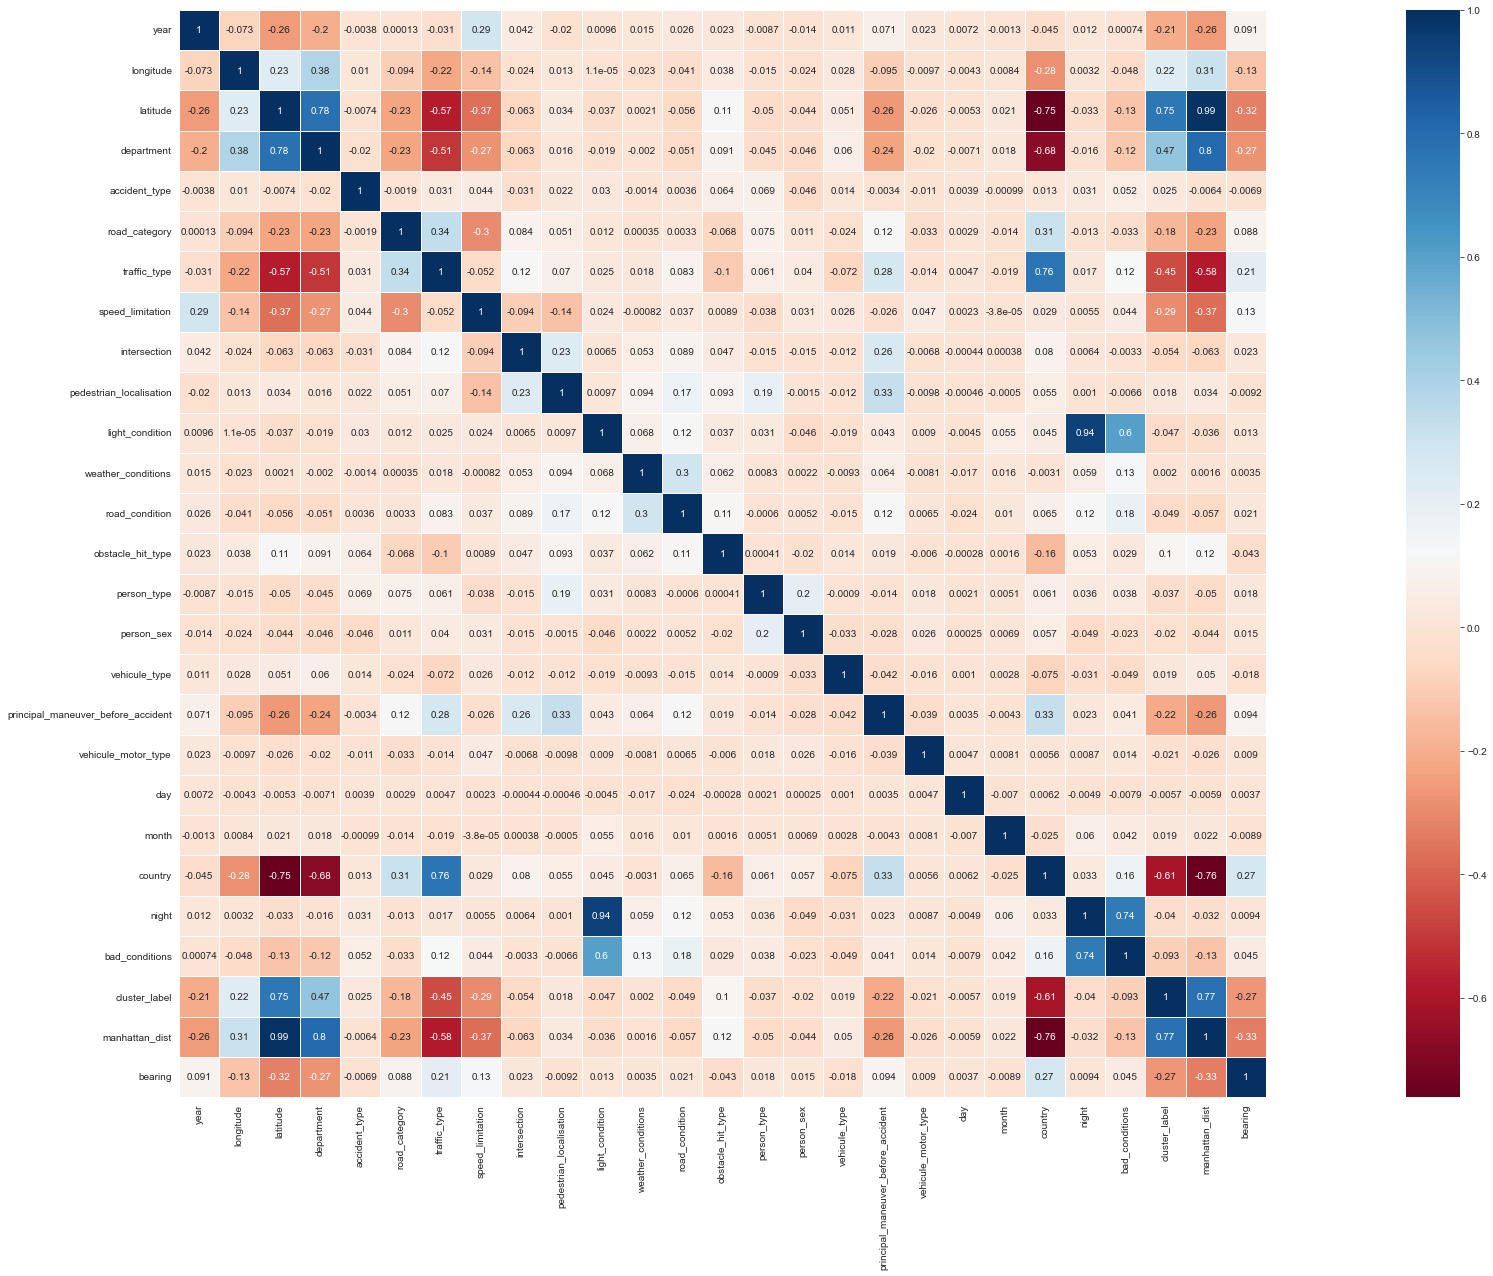

In [588]:
corrmat =train.corr()
f, ax = plt.subplots(figsize=(50,20))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

In [589]:
train.dtypes

year                                  float64
longitude                             float64
latitude                              float64
department                              int32
accident_type                         float64
road_category                         float64
traffic_type                          float64
speed_limitation                      float64
intersection                          float64
pedestrian_localisation               float64
light_condition                       float64
weather_conditions                    float64
road_condition                        float64
obstacle_hit_type                     float64
person_type                           float64
person_sex                            float64
vehicule_type                         float64
principal_maneuver_before_accident    float64
vehicule_motor_type                   float64
day                                   float64
month                                 float64
country                           

In [590]:
test.dtypes

year                                  float64
longitude                             float64
latitude                              float64
department                              int32
road_category                         float64
traffic_type                          float64
speed_limitation                      float64
intersection                          float64
pedestrian_localisation               float64
light_condition                       float64
weather_conditions                    float64
road_condition                        float64
obstacle_hit_type                     float64
person_type                           float64
person_sex                            float64
vehicule_type                         float64
principal_maneuver_before_accident    float64
vehicule_motor_type                   float64
day                                   float64
month                                 float64
country                                 int64
night                             

In [591]:
train=train.drop(columns=['longitude','latitude','bearing'],axis=1)
test=test.drop(columns=['longitude','latitude','bearing'],axis=1)

In [592]:
trustii_id=test['trustii_id']
test=test.drop(['trustii_id'],axis=1)

In [593]:
train.columns

Index(['year', 'department', 'accident_type', 'road_category', 'traffic_type',
       'speed_limitation', 'intersection', 'pedestrian_localisation',
       'light_condition', 'weather_conditions', 'road_condition',
       'obstacle_hit_type', 'person_type', 'person_sex', 'vehicule_type',
       'principal_maneuver_before_accident', 'vehicule_motor_type', 'day',
       'month', 'country', 'night', 'bad_conditions', 'cluster_label',
       'manhattan_dist'],
      dtype='object')

In [594]:
target=train['accident_type']
train=train.drop(['accident_type'],axis=1)

In [595]:
X=train
Y=target

In [596]:
X

,year,department,road_category,traffic_type,speed_limitation,intersection,pedestrian_localisation,light_condition,weather_conditions,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country,night,bad_conditions,cluster_label,manhattan_dist
0,2016.0,590,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,7.0,1.0,1.0,1.0,2.0,0,0.0,0,0,0.000000
1,2016.0,590,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,2.0,2.0,15.0,1.0,1.0,2.0,0,0.0,0,0,0.000000
2,2016.0,590,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,0,0.0,0,0,0.000000
3,2016.0,590,3.0,2.0,30.0,1.0,0.0,1.0,8.0,1.0,0.0,1.0,1.0,2.0,15.0,1.0,1.0,2.0,0,0.0,0,0,0.000000
4,2016.0,590,3.0,1.0,30.0,6.0,0.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,1.0,1.0,16.0,3.0,0,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221213,2019.0,98,3.0,6.0,60.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,19.0,18.0,2.0,30.0,5.0,1,0.0,0,0,58.198906
2221214,2019.0,98,4.0,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,1,0.0,0,0,58.266330
2221215,2019.0,98,4.0,6.0,60.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,1,0.0,0,0,58.266330
2221216,2019.0,98,6.0,6.0,30.0,3.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,9.0,7.0,2.0,29.0,6.0,1,0.0,0,0,58.145783


In [597]:
Y

0          0.0
1          0.0
2          1.0
3          1.0
4          1.0
          ... 
2221213    0.0
2221214    0.0
2221215    0.0
2221216    0.0
2221217    1.0
Name: accident_type, Length: 2221218, dtype: float64

In [598]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.8, random_state=1234)

In [409]:
import gc

In [71]:
del train_data,test_data,X,Y,full_data
gc.collect()

177

In [410]:
from sklearn.metrics import balanced_accuracy_score

In [411]:
from sklearn.ensemble import RandomForestClassifier

In [412]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [413]:
preds=clf.predict(X_val)

In [414]:
preds

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [415]:
balanced_accuracy_score(Y_val,preds)

0.6587022925318656

In [94]:
subs=clf.predict(test)

In [98]:
submission=pd.DataFrame()

In [99]:
submission['trustii_id']=trustii_id

In [110]:
submission['accident_type']=submission['accident_type'].astype(int)

In [112]:
submission=submission.drop(['client_type'],axis=1)

In [115]:
submission['accident_type']=submission['accident_type'].apply(lambda x:x+1)

In [116]:
submission

,trustii_id,accident_type
0,1019363.0,1
1,1019364.0,1
2,1019365.0,1
3,1019366.0,1
4,1019367.0,1
...,...,...
410479,2631697.0,1
410480,2631698.0,1
410481,2631699.0,1
410482,2631700.0,1


In [117]:
submission.to_csv('sub1.csv',sep=',',index=False)

In [180]:
!pip install imbalanced-learn

In [599]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [416]:
# define model
model = BalancedRandomForestClassifier(n_estimators=100)

In [417]:
model.fit(X_train,Y_train)

BalancedRandomForestClassifier()

In [418]:
bp=model.predict(X_val)

In [419]:
balanced_accuracy_score(Y_val,bp)

0.7535605463115741

In [397]:
ptst=model.predict(test)

In [398]:
ptst

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [399]:
d = {"trustii_id": trustii_id, 'accident_type': ptst}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["trustii_id", 'accident_type']]

In [420]:
scores=[]
y_pred=[]
from sklearn.model_selection import KFold
# data sample
# prepare cross validation
fold=KFold(n_splits=5)
# enumerate splits
i=1
for train_index, test_index in fold.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model=BalancedRandomForestClassifier(n_estimators=1000)
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print('err: ',balanced_accuracy_score(y_test,preds))
    scores.append(balanced_accuracy_score(y_test,preds))
    p=model.predict(test)
    print('prediction on test: ',p)
    y_pred.append(p)

err:  0.6360436348016791
prediction on test:  [0 0 0 ... 0 1 1]
err:  0.6873384421562735
prediction on test:  [0 0 0 ... 1 0 1]
err:  0.6413973013461303
prediction on test:  [0 0 0 ... 0 0 1]
err:  0.6135933990481043
prediction on test:  [0 0 0 ... 1 0 1]
err:  0.6127103069468293
prediction on test:  [0 0 0 ... 1 0 1]


In [421]:
np.mean(scores)

0.6382166168598032

In [428]:
y_pred

[array([0, 0, 0, ..., 0, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64)]

In [429]:
d = {"trustii_id": trustii_id, 'accident_type': np.median(y_pred, 0)}

test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["trustii_id", 'accident_type']]

test_predictions['accident_type']=test_predictions['accident_type'].astype('int')

test_predictions['accident_type']=test_predictions['accident_type'].apply(lambda x:x+1)

In [433]:
test_predictions

,trustii_id,accident_type
0,1019363,1
1,1019364,1
2,1019365,1
3,1019366,1
4,1019367,1
...,...,...
410479,2631697,1
410480,2631698,2
410481,2631699,2
410482,2631700,1


In [427]:
test_predictions.to_csv('sub.csv',sep=',',index=False)